<a href="https://colab.research.google.com/github/LittleGreen116/Stock_Prediction/blob/main/Microsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Microsoft_Stock.csv to Microsoft_Stock.csv


In [4]:
data = pd.read_csv('Microsoft_Stock.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [6]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 82.6+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1511, 1)

In [8]:
X_train = []
y_train = []
for i in range (60,1149): #60 : timestep // 1149 : length of the data
        X_train.append(trainData[i-60:i,0]) 
        y_train.append(trainData[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 14s - loss: 0.0096 - 14s/epoch - 386ms/step
Epoch 2/20
35/35 - 6s - loss: 7.4848e-04 - 6s/epoch - 177ms/step
Epoch 3/20
35/35 - 6s - loss: 5.2572e-04 - 6s/epoch - 177ms/step
Epoch 4/20
35/35 - 6s - loss: 5.0307e-04 - 6s/epoch - 176ms/step
Epoch 5/20
35/35 - 6s - loss: 5.1803e-04 - 6s/epoch - 176ms/step
Epoch 6/20
35/35 - 6s - loss: 4.3401e-04 - 6s/epoch - 176ms/step
Epoch 7/20
35/35 - 6s - loss: 4.9289e-04 - 6s/epoch - 177ms/step
Epoch 8/20
35/35 - 6s - loss: 4.6041e-04 - 6s/epoch - 178ms/step
Epoch 9/20
35/35 - 6s - loss: 5.6887e-04 - 6s/epoch - 180ms/step
Epoch 10/20
35/35 - 6s - loss: 4.1056e-04 - 6s/epoch - 177ms/step
Epoch 11/20
35/35 - 6s - loss: 6.2040e-04 - 6s/epoch - 177ms/step
Epoch 12/20
35/35 - 6s - loss: 4.4819e-04 - 6s/epoch - 178ms/step
Epoch 13/20
35/35 - 6s - loss: 6.1259e-04 - 6s/epoch - 177ms/step
Epoch 14/20
35/35 - 6s - loss: 4.7950e-04 - 6s/epoch - 179ms/step
Epoch 15/20
35/35 - 6s - loss: 7.6071e-04 - 6s/epoch - 177ms/step
Epoch 16/20
35/35 - 6

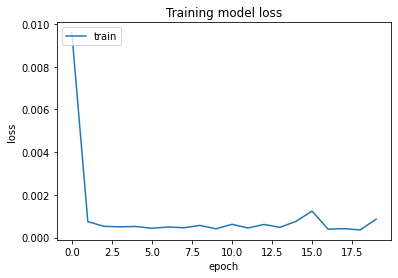

In [10]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [11]:
from google.colab import files
uploaded=files.upload()

Saving MSFT.csv to MSFT.csv


In [12]:
testData = pd.read_csv('MSFT.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(8948, 60, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred


array([[-0.19340798],
       [-0.19340497],
       [-0.19340208],
       ...,
       [ 1.1038378 ],
       [ 1.1038063 ],
       [ 1.1033002 ]], dtype=float32)

In [14]:
predicted_price = sc.inverse_transform(y_pred)

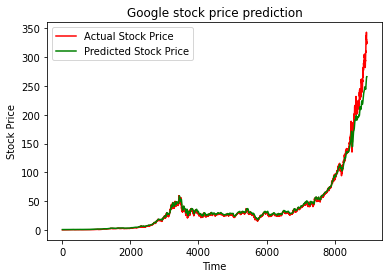

In [15]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()